### 13 Jan 2023

# Fig. 5 code.

NOTE: Apologies for repetition in this script, I will get better at this :).

In [212]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2014

### 1. Read seal data

In [182]:
# To read from pickle after already created 
seal14 = pd.read_pickle('seal14_file')

### 2. Calculate background (lat/lon bounds from pink dashed box in Fig. 1) surface (upper 20 m avg) mean temperature. Set temperature threshold at 3 std greater than background surface temps (see manuscript for details).

In [183]:
# define cool ("background") dives in dataframe within bounding box lat/lon
coolsurf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-74.9 < LATITUDE < -74 & -104.7 < LONGITUDE < -102 & 0.0 <= z <= 20')
coolsurfMJJA14 = coolsurf[(coolsurf['Datetime']>='2014-5-1') & (coolsurf['Datetime']<'2014-9-1')] # constrain winter months

# calculate temperature treshold at 3std > background surface mean
thresh2014 = coolsurfMJJA14['CT'].mean() + 3*coolsurfMJJA14['CT'].std()

# Cutoff T in deg C
print('2014 threshold:',thresh2014) #CT

2014 threshold: -1.5401140979068026


### 3. Separate warm and cool/background profiles based on cutoff temp from step 2 and apply smoothing filter.
Lots of steps here, but essentially we are not doing much, just prepping the data for seperation of warm and cool dives for plotting.

#### May 2014

In [184]:
# isolate may14 data
may14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
may14surf = may14surf[(may14surf['Datetime']>='2014-5-1') & (may14surf['Datetime']<'2014-6-1')]  # now constraining dates
may14surf = may14surf.reset_index()

# Average 
avgmay14 = may14surf['CT'].mean()
# Standard deviation
stdmay14 = may14surf['CT'].std()

# round lat,lon
may14surf['LAT_rounded'] = round(may14surf.iloc[:,3],4)
may14surf['LONG_rounded'] = round(may14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
may14surf = may14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
may14surf = may14surf.reset_index()
#may14surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2014
may14surfwarm = may14surf[may14surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as may20surfwarm
may14surfcool = may14surf[may14surf.iloc[:,5] < warmcutoff] #same for cool

#print(may14surfwarm.count())
#print(may14surfcool.count())  

# add rounded lat long to seal14 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)
#seal14.head()

# isolate warm profiles w entire depth information
may14w = seal14[seal14['LAT_rounded'].isin(may14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(may14surfwarm['LONG_rounded'])]
may14c = seal14[seal14['LAT_rounded'].isin(may14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(may14surfcool['LONG_rounded'])]
#may14w.count()

# probs need to round z first: warm
may14w['z_rounded'] = round(may14w.iloc[:,4])
may14w.head()
may14w_test = may14w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# probs need to round z first: cool
may14c['z_rounded'] = round(may14c.iloc[:,4])
may14c.head()
may14c_test = may14c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
# CT
smooth_may14c = may14c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may14w = may14w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_may14cSA = may14c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may14wSA = may14w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

# PD
smooth_may14cPD = may14c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may14wPD = may14w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/1550554968.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may14c['z_rounded'] = round(may14c.iloc[:,4])


#### June 2014

In [185]:
# isolate june14 data
june14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100  & 0 <= z <= 20')
june14surf = june14surf[(june14surf['Datetime']>='2014-06-1') & (june14surf['Datetime']<'2014-07-1')]  # now constraining dates -- correct code
june14surf = june14surf.reset_index()

# Average 
avgjune14 = june14surf['CT'].mean()
# Standard deviation
stdjune14 = june14surf['CT'].std()

# round lat,lon
june14surf['LAT_rounded'] = round(june14surf.iloc[:,3],4)
june14surf['LONG_rounded'] = round(june14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
june14surf = june14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
june14surf = june14surf.reset_index()
#june14surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2014
june14surfwarm = june14surf[june14surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as june19surfwarm
june14surfcool = june14surf[june14surf.iloc[:,5] < warmcutoff] #same for cool

#print(june14surfwarm.count())
#print(june14surfcool.count())  

# add rounded lat long to seal19 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)
#seal19.head()

# isolate warm profiles w entire depth information
june14w = seal14[seal14['LAT_rounded'].isin(june14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(june14surfwarm['LONG_rounded'])]
june14c = seal14[seal14['LAT_rounded'].isin(june14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(june14surfcool['LONG_rounded'])]
#june19w.count()

# probs need to round z first: warm
june14w['z_rounded'] = round(june14w.iloc[:,4])
june14w.head()
june14w_test = june14w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD':'mean'})

# probs need to round z first: cool
june14c['z_rounded'] = round(june14c.iloc[:,4])
june14c.head()
june14c_test = june14c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
#CT
smooth_june14c = june14c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june14w = june14w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_june14cSA = june14c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june14wSA = june14w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_june14cPD = june14c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june14wPD = june14w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/3618124808.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june14w['z_rounded'] = round(june14w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/3618124808.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june14c['z_rounded'] = round(june14c.iloc[:,4])


#### July 2014

In [186]:
# isolate july14 data
july14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
july14surf = july14surf[(july14surf['Datetime']>='2014-7-1') & (july14surf['Datetime']<'2014-8-1')]  # now constraining dates -- correct code
july14surf = july14surf.reset_index()

# Average 
avgjuly14 = july14surf['CT'].mean()
# Standard deviation
stdjuly14 = july14surf['CT'].std()

# round lat,lon
july14surf['LAT_rounded'] = round(july14surf.iloc[:,3],4)
july14surf['LONG_rounded'] = round(july14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
july14surf = july14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD':'mean'})
july14surf = july14surf.reset_index()
#july14surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2014
july14surfwarm = july14surf[july14surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as july19surfwarm
july14surfcool = july14surf[july14surf.iloc[:,5] < warmcutoff] #same for cool

#print(july14surfwarm.count())
#print(july14surfcool.count())  

# add rounded lat long to seal19 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)
#seal19.head()

# isolate warm profiles w entire depth information
july14w = seal14[seal14['LAT_rounded'].isin(july14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(july14surfwarm['LONG_rounded'])]
july14c = seal14[seal14['LAT_rounded'].isin(july14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(july14surfcool['LONG_rounded'])]
#july19w.count()

# probs need to round z first: warm
july14w['z_rounded'] = round(july14w.iloc[:,4])
july14w.head()
july14w_test = july14w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD':'mean'})

# probs need to round z first: cool
july14c['z_rounded'] = round(july14c.iloc[:,4])
july14c.head()
july14c_test = july14c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
smooth_july14c = july14c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july14w = july14w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_july14cSA = july14c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july14wSA = july14w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_july14cPD = july14c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july14wPD = july14w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/1786032757.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july14w['z_rounded'] = round(july14w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/1786032757.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july14c['z_rounded'] = round(july14c.iloc[:,4])


#### August 2014

In [187]:
# isolate aug14 data
aug14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
aug14surf = aug14surf[(aug14surf['Datetime']>='2014-8-1') & (aug14surf['Datetime']<'2014-9-1 ')]  # now constraining dates -- correct code
aug14surf = aug14surf.reset_index()

# Average 
avgaug14 = aug14surf['CT'].mean()
# Standard deviation
stdaug14 = aug14surf['CT'].std()

# round lat,lon
aug14surf['LAT_rounded'] = round(aug14surf.iloc[:,3],4)
aug14surf['LONG_rounded'] = round(aug14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
aug14surf = aug14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
aug14surf = aug14surf.reset_index()
#aug14surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
aug14surfwarm = aug14surf[aug14surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as aug19surfwarm
aug14surfcool = aug14surf[aug14surf.iloc[:,5] < warmcutoff] #same for cool

#print(aug14surfwarm.count())
#print(aug14surfcool.count())  

# add rounded lat long to seal19 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)
#seal19.head()

# isolate warm profiles w entire depth information
aug14w = seal14[seal14['LAT_rounded'].isin(aug14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(aug14surfwarm['LONG_rounded'])]
aug14c = seal14[seal14['LAT_rounded'].isin(aug14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(aug14surfcool['LONG_rounded'])]
#aug19w.count()

# probs need to round z first: warm
aug14w['z_rounded'] = round(aug14w.iloc[:,4])
aug14w.head()
aug14w_test = aug14w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# probs need to round z first: cool
aug14c['z_rounded'] = round(aug14c.iloc[:,4])
aug14c.head()
aug14c_test = aug14c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
# CT
smooth_aug14c = aug14c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug14w = aug14w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_aug14cSA = aug14c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug14wSA = aug14w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_aug14cPD = aug14c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug14wPD = aug14w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/2001301592.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug14w['z_rounded'] = round(aug14w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/2001301592.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug14c['z_rounded'] = round(aug14c.iloc[:,4])


### 4. Calculate no of dives for each month, reset dataframe index and plot profiles!

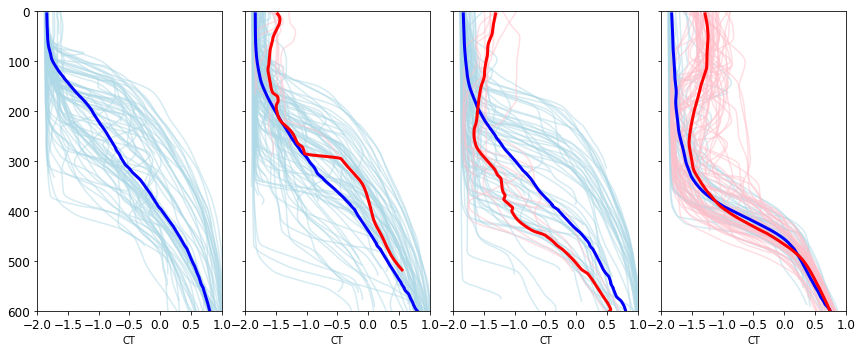

In [159]:
# Define number of dives for each month
Nw_may14 = may14w[may14w['z_rounded']==0].count()
Nw_may14 = Nw_may14[0]
Nc_may14 = may14c[may14c['z_rounded']==0].count()
Nc_may14 = Nc_may14[0]

Nw_june14 = june14w[june14w['z_rounded']==0].count()
Nw_june14 = Nw_june14[0]
Nc_june14 = june14c[june14c['z_rounded']==0].count()
Nc_june14 = Nc_june14[0]

Nw_july14 = july14w[july14w['z_rounded']==0].count()
Nw_july14 = Nw_july14[0]
Nc_july14 = july14c[july14c['z_rounded']==0].count()
Nc_july14 = Nc_july14[0]

Nw_aug14 = aug14w[aug14w['z_rounded']==0].count()
Nw_aug14 = Nw_aug14[0]
Nc_aug14 = aug14c[aug14c['z_rounded']==0].count()
Nc_aug14 = Nc_aug14[0]

#need to set index to CT to plot CT (run once and comment out)
may14c.reset_index(inplace=True)
may14w.reset_index(inplace=True)
may14c.set_index('CT', inplace=True)
may14w.set_index('CT', inplace=True)

june14c.reset_index(inplace=True)
june14w.reset_index(inplace=True)
june14c.set_index('CT', inplace=True)
june14w.set_index('CT', inplace=True)

july14c.reset_index(inplace=True)
july14w.reset_index(inplace=True)
july14c.set_index('CT', inplace=True)
july14w.set_index('CT', inplace=True)

aug14c.reset_index(inplace=True)
aug14w.reset_index(inplace=True)
aug14c.set_index('CT', inplace=True)
aug14w.set_index('CT', inplace=True)

# plot
plt.figure(figsize=(12,5))
# # CT
plt.subplot(141)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
may14c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
may14w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_may14c, may14c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_may14w, may14w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('May 2014')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.ylabel('Depth [m]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_may14, Nc_may14))
plt.gca().invert_yaxis()
#
plt.subplot(142)
plt.xticks(fontsize=12)
june14c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
june14w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_june14c, june14c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_june14w, june14w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('June 2014')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_june14, Nc_june14))
#plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
#
plt.subplot(143)
plt.xticks(fontsize=12)
july14c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
july14w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_july14c, july14c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_july14w, july14w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('July 2014')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_july14, Nc_july14))
#plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
#
plt.subplot(144)
plt.xticks(fontsize=12)
aug14c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
aug14w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_aug14c, aug14c_test.z_rounded['mean'], c='b',linewidth=3, label = 'mean cool')
plt.plot(smooth_aug14w, aug14w_test.z_rounded['mean'], c='r',linewidth=3, label = 'mean warm')
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('August 2014')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_aug14, Nc_aug14))
#plt.legend()
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
plt.tight_layout()

#plt.savefig('fig5_2014_updated.png', format='png', dpi=400)

## 2019

### 1. Read seal data

In [188]:
# To read from pickle after already created 
seal19 = pd.read_pickle('seal19_file')

### 2. Calculate background (lat/lon bounds from pink dashed box in Fig. 1) surface (upper 20 m avg) mean temperature. Set temperature threshold at 3 std greater than background surface temps (see manuscript for details).

In [189]:
# define cool ("background") dives in dataframe within bounding box lat/lon
coolsurf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-74.9 < LATITUDE < -74 & -104.7 < LONGITUDE < -102 & 0.0 <= z <= 20')
coolsurfMJJA19 = coolsurf[(coolsurf['Datetime']>='2019-5-1') & (coolsurf['Datetime']<'2019-9-1')] # constrain winter months

# calculate temperature treshold at 3std > background surface mean
thresh2019 = coolsurfMJJA19['CT'].mean() + 3*coolsurfMJJA19['CT'].std()

# Cutoff T in deg C
print('2019 threshold:',thresh2019) #CT

2019 threshold: -1.685284795066211


### 3. Separate warm and cool/background profiles based on cutoff temp from step 2 and apply smoothing filter.
Lots of steps here, but essentially we are not doing much, just prepping the data for seperation of warm and cool dives for plotting.

#### May 2019

In [208]:
# isolate may19 data
may19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
may19surf = may19surf[(may19surf['Datetime']>='2019-5-1') & (may19surf['Datetime']<'2019-6-1')]  # now constraining dates
may19surf = may19surf.reset_index()

# Average 
avgmay19 = may19surf['CT'].mean()
# Standard deviation
stdmay19 = may19surf['CT'].std()

# round lat,lon
may19surf['LAT_rounded'] = round(may19surf.iloc[:,3],4)
may19surf['LONG_rounded'] = round(may19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
may19surf = may19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
may19surf = may19surf.reset_index()
#may19surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2019
may19surfwarm = may19surf[may19surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as may19surfwarm
may19surfcool = may19surf[may19surf.iloc[:,5] < warmcutoff] #same for cool

#print(may19surfwarm.count())
#print(may19surfcool.count())  

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)
#seal19.head()

# isolate warm profiles w entire depth information
may19w = seal19[seal19['LAT_rounded'].isin(may19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(may19surfwarm['LONG_rounded'])]
may19c = seal19[seal19['LAT_rounded'].isin(may19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(may19surfcool['LONG_rounded'])]
#may19w.count()

# probs need to round z first: warm
may19w['z_rounded'] = round(may19w.iloc[:,4])
may19w.head()
may19w_test = may19w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# probs need to round z first: cool
may19c['z_rounded'] = round(may19c.iloc[:,4])
may19c.head()
may19c_test = may19c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
# CT
smooth_may19c = may19c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may19w = may19w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_may19cSA = may19c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may19wSA = may19w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

# PD
smooth_may19cPD = may19c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may19wPD = may19w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/491077204.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may19w['z_rounded'] = round(may19w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/491077204.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may19c['z_rounded'] = round(may19c.iloc[:,4])


#### June 2019

In [201]:
# isolate june19 data
june19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100  & 0 <= z <= 20')
june19surf = june19surf[(june19surf['Datetime']>='2019-06-1') & (june19surf['Datetime']<'2019-07-1')]  # now constraining dates -- correct code
june19surf = june19surf.reset_index()

# Average 
avgjune19 = june19surf['CT'].mean()
# Standard deviation
stdjune19 = june19surf['CT'].std()

# round lat,lon
june19surf['LAT_rounded'] = round(june19surf.iloc[:,3],4)
june19surf['LONG_rounded'] = round(june19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
june19surf = june19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
june19surf = june19surf.reset_index()
#june19surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2019
june19surfwarm = june19surf[june19surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as june19surfwarm
june19surfcool = june19surf[june19surf.iloc[:,5] < warmcutoff] #same for cool

#print(june19surfwarm.count())
#print(june19surfcool.count())  

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)
#seal19.head()

# isolate warm profiles w entire depth information
june19w = seal19[seal19['LAT_rounded'].isin(june19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(june19surfwarm['LONG_rounded'])]
june19c = seal19[seal19['LAT_rounded'].isin(june19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(june19surfcool['LONG_rounded'])]
#june19w.count()

# probs need to round z first: warm
june19w['z_rounded'] = round(june19w.iloc[:,4])
june19w.head()
june19w_test = june19w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD':'mean'})

# probs need to round z first: cool
june19c['z_rounded'] = round(june19c.iloc[:,4])
june19c.head()
june19c_test = june19c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
#CT
smooth_june19c = june19c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june19w = june19w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_june19cSA = june19c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june19wSA = june19w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_june19cPD = june19c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june19wPD = june19w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/2783847909.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june19w['z_rounded'] = round(june19w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/2783847909.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june19c['z_rounded'] = round(june19c.iloc[:,4])


#### July 2019

In [202]:
# isolate july19 data
july19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
july19surf = july19surf[(july19surf['Datetime']>='2019-7-1') & (july19surf['Datetime']<'2019-8-1')]  # now constraining dates -- correct code
july19surf = july19surf.reset_index()

# Average 
avgjuly19 = july19surf['CT'].mean()
# Standard deviation
stdjuly19 = july19surf['CT'].std()

# round lat,lon
july19surf['LAT_rounded'] = round(july19surf.iloc[:,3],4)
july19surf['LONG_rounded'] = round(july19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
july19surf = july19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD':'mean'})
july19surf = july19surf.reset_index()
#july19surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2019
july19surfwarm = july19surf[july19surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as july19surfwarm
july19surfcool = july19surf[july19surf.iloc[:,5] < warmcutoff] #same for cool

#print(july19surfwarm.count())
#print(july19surfcool.count())  

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)
#seal19.head()

# isolate warm profiles w entire depth information
july19w = seal19[seal19['LAT_rounded'].isin(july19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(july19surfwarm['LONG_rounded'])]
july19c = seal19[seal19['LAT_rounded'].isin(july19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(july19surfcool['LONG_rounded'])]
#july19w.count()

# probs need to round z first: warm
july19w['z_rounded'] = round(july19w.iloc[:,4])
july19w.head()
july19w_test = july19w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD':'mean'})

# probs need to round z first: cool
july19c['z_rounded'] = round(july19c.iloc[:,4])
july19c.head()
july19c_test = july19c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
smooth_july19c = july19c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july19w = july19w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_july19cSA = july19c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july19wSA = july19w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_july19cPD = july19c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july19wPD = july19w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/2855857420.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july19w['z_rounded'] = round(july19w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/2855857420.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july19c['z_rounded'] = round(july19c.iloc[:,4])


#### August 2019

In [203]:
# isolate aug19 data
aug19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
aug19surf = aug19surf[(aug19surf['Datetime']>='2019-8-1') & (aug19surf['Datetime']<'2019-9-1 ')]  # now constraining dates -- correct code
aug19surf = aug19surf.reset_index()

# Average 
avgaug19 = aug19surf['CT'].mean()
# Standard deviation
stdaug19 = aug19surf['CT'].std()

# round lat,lon
aug19surf['LAT_rounded'] = round(aug19surf.iloc[:,3],4)
aug19surf['LONG_rounded'] = round(aug19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
aug19surf = aug19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
aug19surf = aug19surf.reset_index()
#aug19surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
aug19surfwarm = aug19surf[aug19surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as aug19surfwarm
aug19surfcool = aug19surf[aug19surf.iloc[:,5] < warmcutoff] #same for cool

#print(aug19surfwarm.count())
#print(aug19surfcool.count())  

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)
#seal19.head()

# isolate warm profiles w entire depth information
aug19w = seal19[seal19['LAT_rounded'].isin(aug19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(aug19surfwarm['LONG_rounded'])]
aug19c = seal19[seal19['LAT_rounded'].isin(aug19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(aug19surfcool['LONG_rounded'])]
#aug19w.count()

# probs need to round z first: warm
aug19w['z_rounded'] = round(aug19w.iloc[:,4])
aug19w.head()
aug19w_test = aug19w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# probs need to round z first: cool
aug19c['z_rounded'] = round(aug19c.iloc[:,4])
aug19c.head()
aug19c_test = aug19c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
# CT
smooth_aug19c = aug19c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug19w = aug19w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_aug19cSA = aug19c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug19wSA = aug19w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_aug19cPD = aug19c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug19wPD = aug19w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/3826765660.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug19c['z_rounded'] = round(aug19c.iloc[:,4])


### 5. Calculate no of dives for each month, reset dataframe index and plot profiles!

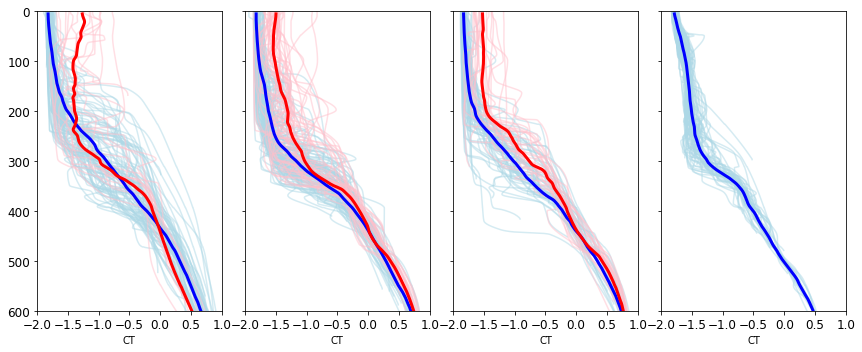

In [167]:
# Define number of dives for each month
Nw_may19 = may19w[may19w['z_rounded']==0].count()
Nw_may19 = Nw_may19[0]
Nc_may19 = may19c[may19c['z_rounded']==0].count()
Nc_may19 = Nc_may19[0]

Nw_june19 = june19w[june19w['z_rounded']==0].count()
Nw_june19 = Nw_june19[0]
Nc_june19 = june19c[june19c['z_rounded']==0].count()
Nc_june19 = Nc_june19[0]

Nw_july19 = july19w[july19w['z_rounded']==0].count()
Nw_july19 = Nw_july19[0]
Nc_july19 = july19c[july19c['z_rounded']==0].count()
Nc_july19 = Nc_july19[0]

Nw_aug19 = aug19w[aug19w['z_rounded']==0].count()
Nw_aug19 = Nw_aug19[0]
Nc_aug19 = aug19c[aug19c['z_rounded']==0].count()
Nc_aug19 = Nc_aug19[0]

#need to set index to CT to plot CT (run once and comment out)
may19c.reset_index(inplace=True)
may19w.reset_index(inplace=True)
may19c.set_index('CT', inplace=True)
may19w.set_index('CT', inplace=True)

june19c.reset_index(inplace=True)
june19w.reset_index(inplace=True)
june19c.set_index('CT', inplace=True)
june19w.set_index('CT', inplace=True)

july19c.reset_index(inplace=True)
july19w.reset_index(inplace=True)
july19c.set_index('CT', inplace=True)
july19w.set_index('CT', inplace=True)

aug19c.reset_index(inplace=True)
aug19w.reset_index(inplace=True)
aug19c.set_index('CT', inplace=True)
aug19w.set_index('CT', inplace=True)

# plot
plt.figure(figsize=(12,5))
# # CT
plt.subplot(141)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
may19c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
may19w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_may19c, may19c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_may19w, may19w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('May 2019')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.ylabel('Depth [m]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_may19, Nc_may19))
plt.gca().invert_yaxis()
#
plt.subplot(142)
plt.xticks(fontsize=12)
june19c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
june19w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_june19c, june19c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_june19w, june19w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('June 2019')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_june19, Nc_june19))
#plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
#
plt.subplot(143)
plt.xticks(fontsize=12)
july19c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
july19w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_july19c, july19c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_july19w, july19w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('July 2019')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_july19, Nc_july19))
#plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
#
plt.subplot(144)
plt.xticks(fontsize=12)
aug19c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
aug19w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_aug19c, aug19c_test.z_rounded['mean'], c='b',linewidth=3, label = 'mean cool')
plt.plot(smooth_aug19w, aug19w_test.z_rounded['mean'], c='r',linewidth=3, label = 'mean warm')
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('August 2019')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_aug19, Nc_aug19))
#plt.legend()
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
plt.tight_layout()

#plt.savefig('fig5_2019_updated.png', format='png', dpi=400)

## 2020

### 1. Read seal data

In [168]:
# To read from pickle after already created 
#seal20 = pd.read_pickle('../AmundsenSeal2020_20220106.pkl')

seal20 = pd.read_pickle('seal20_file')

### 2. Calculate background (lat/lon bounds from pink dashed box in Fig. 1) surface (upper 20 m avg) mean temperature. Set temperature threshold at 3 std greater than background surface temps (see manuscript for details).

In [179]:
# define cool ("background") dives in dataframe within bounding box lat/lon
coolsurf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-74.9 < LATITUDE < -74 & -104.7 < LONGITUDE < -102 & 0.0 <= z <= 20')
coolsurfMJJA20 = coolsurf[(coolsurf['Datetime']>='2020-5-1') & (coolsurf['Datetime']<'2020-9-1')] # constrain winter months

# calculate temperature treshold at 3std > background surface mean
thresh2020 = coolsurfMJJA20['CT'].mean() + 3*coolsurfMJJA20['CT'].std()

# Cutoff T in deg C
print('2020 threshold:',thresh2020) #CT

2020 threshold: -1.7421517137000042


### 3. Separate warm and cool/background profiles based on cutoff temp from step 2 and apply smoothing filter.
Lots of steps here, but essentially we are not doing much, just prepping the data for seperation of warm and cool dives for plotting.

#### May 2020

In [170]:
# isolate may20 data
may20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
may20surf = may20surf[(may20surf['Datetime']>='2020-5-1') & (may20surf['Datetime']<'2020-6-1')]  # now constraining dates
may20surf = may20surf.reset_index()

# Average 
avgmay20 = may20surf['CT'].mean()
# Standard deviation
stdmay20 = may20surf['CT'].std()

# round lat,lon
may20surf['LAT_rounded'] = round(may20surf.iloc[:,3],4)
may20surf['LONG_rounded'] = round(may20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
may20surf = may20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
may20surf = may20surf.reset_index()
#may20surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2020
may20surfwarm = may20surf[may20surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as may20surfwarm
may20surfcool = may20surf[may20surf.iloc[:,5] < warmcutoff] #same for cool

#print(may20surfwarm.count())
#print(may20surfcool.count())  

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)
#seal20.head()

# isolate warm profiles w entire depth information
may20w = seal20[seal20['LAT_rounded'].isin(may20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(may20surfwarm['LONG_rounded'])]
may20c = seal20[seal20['LAT_rounded'].isin(may20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(may20surfcool['LONG_rounded'])]
#may20w.count()

# probs need to round z first: warm
may20w['z_rounded'] = round(may20w.iloc[:,4])
may20w.head()
may20w_test = may20w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# probs need to round z first: cool
may20c['z_rounded'] = round(may20c.iloc[:,4])
may20c.head()
may20c_test = may20c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
# CT
smooth_may20c = may20c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may20w = may20w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_may20cSA = may20c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may20wSA = may20w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

# PD
smooth_may20cPD = may20c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_may20wPD = may20w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/883690789.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may20w['z_rounded'] = round(may20w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/883690789.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may20c['z_rounded'] = round(may20c.iloc[:,4])


#### June 2020

In [171]:
# isolate june20 data
june20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100  & 0 <= z <= 20')
june20surf = june20surf[(june20surf['Datetime']>='2020-06-1') & (june20surf['Datetime']<'2020-07-1')]  # now constraining dates -- correct code
june20surf = june20surf.reset_index()

# Average 
avgjune20 = june20surf['CT'].mean()
# Standard deviation
stdjune20 = june20surf['CT'].std()

# round lat,lon
june20surf['LAT_rounded'] = round(june20surf.iloc[:,3],4)
june20surf['LONG_rounded'] = round(june20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
june20surf = june20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
june20surf = june20surf.reset_index()
#june20surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2020
june20surfwarm = june20surf[june20surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as june20surfwarm
june20surfcool = june20surf[june20surf.iloc[:,5] < warmcutoff] #same for cool

#print(june20surfwarm.count())
#print(june20surfcool.count())  

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)
#seal20.head()

# isolate warm profiles w entire depth information
june20w = seal20[seal20['LAT_rounded'].isin(june20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(june20surfwarm['LONG_rounded'])]
june20c = seal20[seal20['LAT_rounded'].isin(june20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(june20surfcool['LONG_rounded'])]
#june20w.count()

# probs need to round z first: warm
june20w['z_rounded'] = round(june20w.iloc[:,4])
june20w.head()
june20w_test = june20w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD':'mean'})

# probs need to round z first: cool
june20c['z_rounded'] = round(june20c.iloc[:,4])
june20c.head()
june20c_test = june20c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
#CT
smooth_june20c = june20c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june20w = june20w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_june20cSA = june20c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june20wSA = june20w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_june20cPD = june20c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_june20wPD = june20w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/691796100.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june20w['z_rounded'] = round(june20w.iloc[:,4])
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/691796100.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june20c['z_rounded'] = round(june20c.iloc[:,4])


#### July 2020

In [172]:
# isolate july20 data
july20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
july20surf = july20surf[(july20surf['Datetime']>='2020-7-1') & (july20surf['Datetime']<'2020-8-1')]  # now constraining dates -- correct code
july20surf = july20surf.reset_index()

# Average 
avgjuly20 = july20surf['CT'].mean()
# Standard deviation
stdjuly20 = july20surf['CT'].std()

# round lat,lon
july20surf['LAT_rounded'] = round(july20surf.iloc[:,3],4)
july20surf['LONG_rounded'] = round(july20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
july20surf = july20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD':'mean'})
july20surf = july20surf.reset_index()
#july20surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
warmcutoff = thresh2020
july20surfwarm = july20surf[july20surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as july20surfwarm
july20surfcool = july20surf[july20surf.iloc[:,5] < warmcutoff] #same for cool

#print(july20surfwarm.count())
#print(july20surfcool.count())  

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)
#seal20.head()

# isolate warm profiles w entire depth information
july20w = seal20[seal20['LAT_rounded'].isin(july20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(july20surfwarm['LONG_rounded'])]
july20c = seal20[seal20['LAT_rounded'].isin(july20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(july20surfcool['LONG_rounded'])]
#july20w.count()

# probs need to round z first: warm
july20w['z_rounded'] = round(july20w.iloc[:,4])
july20w.head()
july20w_test = july20w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD':'mean'})

# probs need to round z first: cool
july20c['z_rounded'] = round(july20c.iloc[:,4])
july20c.head()
july20c_test = july20c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
smooth_july20c = july20c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july20w = july20w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_july20cSA = july20c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july20wSA = july20w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_july20cPD = july20c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_july20wPD = july20w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/584683722.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july20c['z_rounded'] = round(july20c.iloc[:,4])


#### August 2020

In [173]:
# isolate aug20 data
aug20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
aug20surf = aug20surf[(aug20surf['Datetime']>='2020-8-1') & (aug20surf['Datetime']<'2020-9-1 ')]  # now constraining dates -- correct code
aug20surf = aug20surf.reset_index()

# Average 
avgaug20 = aug20surf['CT'].mean()
# Standard deviation
stdaug20 = aug20surf['CT'].std()

# round lat,lon
aug20surf['LAT_rounded'] = round(aug20surf.iloc[:,3],4)
aug20surf['LONG_rounded'] = round(aug20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
aug20surf = aug20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean', 'PD': 'mean'})
aug20surf = aug20surf.reset_index()
#aug20surf.head(5)

# isolate warm profiles based on (>3 std cutoff)
aug20surfwarm = aug20surf[aug20surf.iloc[:,5] > warmcutoff] #col 5 is CT, wherever CT > cutoff, define as aug20surfwarm
aug20surfcool = aug20surf[aug20surf.iloc[:,5] < warmcutoff] #same for cool

#print(aug20surfwarm.count())
#print(aug20surfcool.count())  

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)
#seal20.head()

# isolate warm profiles w entire depth information
aug20w = seal20[seal20['LAT_rounded'].isin(aug20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(aug20surfwarm['LONG_rounded'])]
aug20c = seal20[seal20['LAT_rounded'].isin(aug20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(aug20surfcool['LONG_rounded'])]
#aug20w.count()

# probs need to round z first: warm
aug20w['z_rounded'] = round(aug20w.iloc[:,4])
aug20w.head()
aug20w_test = aug20w.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# probs need to round z first: cool
aug20c['z_rounded'] = round(aug20c.iloc[:,4])
aug20c.head()
aug20c_test = aug20c.groupby(['z_rounded'],as_index=False).agg({'z_rounded' : 'mean','CT': ['mean','std','sem'], 'SA': 'mean', 'PD': 'mean'})

# apply Gaussian filter before plotting (smoothing)
# CT
smooth_aug20c = aug20c_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug20w = aug20w_test.CT['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# SA
smooth_aug20cSA = aug20c_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug20wSA = aug20w_test.SA['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
# PD
smooth_aug20cPD = aug20c_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)
smooth_aug20wPD = aug20w_test.PD['mean'].rolling(window=10, win_type='gaussian',center=True).mean(std=3)

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_5084/3287379125.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug20c['z_rounded'] = round(aug20c.iloc[:,4])


### 4. Calculate no of dives for each month, reset dataframe index and plot profiles!

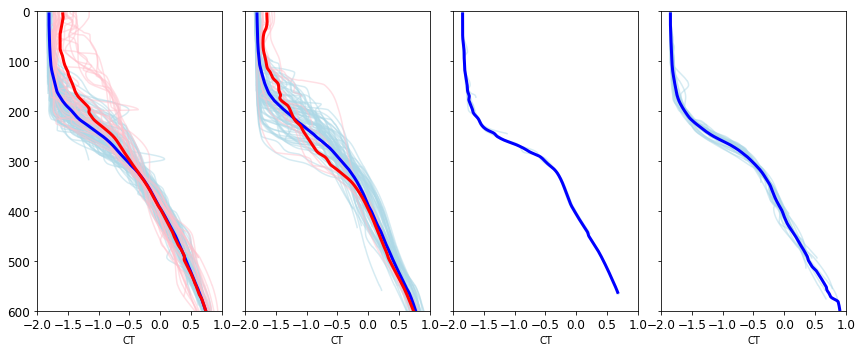

In [175]:
# Define number of dives for each month
Nw_may20 = may20w[may20w['z_rounded']==0].count()
Nw_may20 = Nw_may20[0]
Nc_may20 = may20c[may20c['z_rounded']==0].count()
Nc_may20 = Nc_may20[0]

Nw_june20 = june20w[june20w['z_rounded']==0].count()
Nw_june20 = Nw_june20[0]
Nc_june20 = june20c[june20c['z_rounded']==0].count()
Nc_june20 = Nc_june20[0]

Nw_july20 = july20w[july20w['z_rounded']==0].count()
Nw_july20 = Nw_july20[0]
Nc_july20 = july20c[july20c['z_rounded']==0].count()
Nc_july20 = Nc_july20[0]

Nw_aug20 = aug20w[aug20w['z_rounded']==0].count()
Nw_aug20 = Nw_aug20[0]
Nc_aug20 = aug20c[aug20c['z_rounded']==0].count()
Nc_aug20 = Nc_aug20[0]

#need to set index to CT to plot CT (run once and comment out)
may20c.reset_index(inplace=True)
may20w.reset_index(inplace=True)
may20c.set_index('CT', inplace=True)
may20w.set_index('CT', inplace=True)

june20c.reset_index(inplace=True)
june20w.reset_index(inplace=True)
june20c.set_index('CT', inplace=True)
june20w.set_index('CT', inplace=True)

july20c.reset_index(inplace=True)
july20w.reset_index(inplace=True)
july20c.set_index('CT', inplace=True)
july20w.set_index('CT', inplace=True)

aug20c.reset_index(inplace=True)
aug20w.reset_index(inplace=True)
aug20c.set_index('CT', inplace=True)
aug20w.set_index('CT', inplace=True)

# plot
plt.figure(figsize=(12,5))
# # CT
plt.subplot(141)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
may20c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
may20w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_may20c, may20c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_may20w, may20w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('May 2020')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.ylabel('Depth [m]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_may20, Nc_may20))
plt.gca().invert_yaxis()
#
plt.subplot(142)
plt.xticks(fontsize=12)
june20c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
june20w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_june20c, june20c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_june20w, june20w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('June 2020')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_june20, Nc_june20))
#plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
#
plt.subplot(143)
plt.xticks(fontsize=12)
july20c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
july20w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_july20c, july20c_test.z_rounded['mean'], c='b',linewidth=3)
plt.plot(smooth_july20w, july20w_test.z_rounded['mean'], c='r',linewidth=3)
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('July 2020')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_july20, Nc_july20))
#plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
#
plt.subplot(144)
plt.xticks(fontsize=12)
aug20c.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='lightblue',alpha=0.5)
aug20w.groupby(['LAT_rounded','LONG_rounded'])['z_rounded'].plot(color='pink',alpha=0.5)
plt.plot(smooth_aug20c, aug20c_test.z_rounded['mean'], c='b',linewidth=3, label = 'mean cool')
plt.plot(smooth_aug20w, aug20w_test.z_rounded['mean'], c='r',linewidth=3, label = 'mean warm')
plt.xlim(-2,1)
plt.ylim(0,600)
#plt.title('August 2020')
#plt.xlabel('Temperature [$^\circ$C]')
#plt.text(0,50, '$N_{warm}$ = %s\n $N_{cool}$ = %s' % (Nw_aug20, Nc_aug20))
#plt.legend()
plt.gca().invert_yaxis()
plt.tick_params(labelleft=False)  
plt.tight_layout()

#plt.savefig('fig5_2020_updated.png', format='png', dpi=400)

In [213]:
# check avg diff in T between avg cool and warm
# 2014
np.abs(smooth_june14c[5] - smooth_june14w[5]),np.abs(smooth_july14c[5] - smooth_july14w[5]),np.abs(smooth_aug14c[5] - smooth_aug14w[5])

(0.3634454456153755, 0.5247938578743854, 0.5419392716423688)

In [214]:
# check avg diff in T between avg cool and warm
# 2019
np.abs(smooth_may19c[5] - smooth_may19w[5]),np.abs(smooth_june19c[5] - smooth_june19w[5]),np.abs(smooth_july19c[5] - smooth_july19w[5])

(0.5559662158999259, 0.32223693423254307, 0.3080078549373513)

In [217]:
# check avg diff in T between avg cool and warm
# 2020
np.abs(smooth_may20c[5] - smooth_may20w[5]),np.abs(smooth_june20c[5] - smooth_june20w[5])

(0.2241068569401039, 0.15981087540675265)

### 6. I save all panels and format for submission in illustrator or powerpoint :)

Screenshot of Fig. 5 from Savidge et al., 2023:

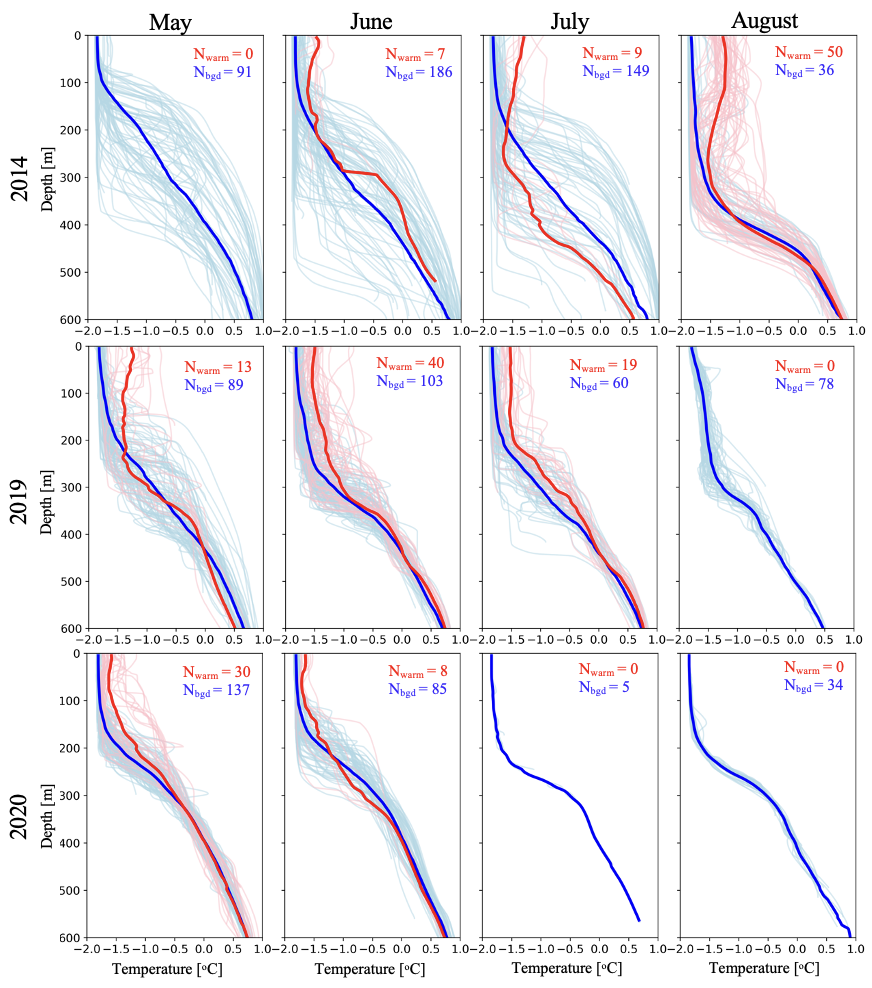

### ~ES